In [1]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk.csv


#Import the data

In [2]:
import pandas as pd
df = pd.read_csv('Elon_musk.csv',encoding=('latin1'))

In [3]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


#Importing the Packages and libraries 

In [4]:
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import string

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer()
Vt = Vectorizer.fit_transform(df['Text'])
Vt.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Creating a User-Defined Function for DataCleaning

In [9]:

def cleanText(TWEET):
  TWEET = re.sub(r'@[A-Za-z0-9]+', '', TWEET) #to remove @mentions
  TWEET = re.sub(r'#', '', TWEET) #to remove hashtag symbol
  TWEET = re.sub(r'RT[\s]+', '', TWEET) #to remove retweets
  TWEET = re.sub(r'https?:\/\/\S+', '', TWEET)#to remove the hyperlinks
  TWEET = "".join([x for x in TWEET if x not in string.punctuation]) #to remove punc
  TWEET = re.sub(' +', ' ', TWEET) #to remove extra white spaces
  TWEET = TWEET.translate(str.maketrans(" ", " ", string.punctuation))
  TWEET = TWEET.lower() #to change to lower
  TWEET = lemmatizer.lemmatize(TWEET)
  tokens = TWEET.split(" ")
  tokens = [token for token in tokens if token not in my_stopwords] #taking only words which are not in stopwords
  TWEET = " ".join([ps.stem(token) for token in tokens])

  return TWEET



In [11]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
df['Text'] = df['Text'].apply(cleanText)

#Cleaning the text

In [16]:
df['Text']

0                                               im alien
1         aacarmack ray trace cyberpunk hdr nextlevel tri
2                                         great interview
3                                         doge underestim
4        congratul tesla china amaz execut last year n...
                              ...                        
1994     true sound surreal neg propaganda still amp e...
1995       make sure read ur term amp condit click accept
1996                                         samwis gamge
1997                 altho dumb dumber u0001f525u0001f525
1998                             progress updat august 28
Name: Text, Length: 1999, dtype: object

#Creating a functions to get the Subjectivity, Polarity

In [17]:

def getSubjectivity(TWEET):
  return TextBlob(TWEET).sentiment.subjectivity

def getPolarity(TWEET):
  return TextBlob(TWEET).sentiment.polarity

df['Subjectivity'] = df['Text'].apply(getSubjectivity)
df['Polarity'] = df['Text'].apply(getPolarity)

#Applied Senti-mental Analysis

In [18]:
df

,Unnamed: 0,Text,Subjectivity,Polarity
0,1,im alien,0.750000,-0.250000
1,2,aacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,0.000000
2,3,great interview,0.750000,0.800000
3,4,doge underestim,0.000000,0.000000
4,5,congratul tesla china amaz execut last year n...,0.033333,0.000000
...,...,...,...,...
1994,1995,true sound surreal neg propaganda still amp e...,0.443333,0.186667
1995,1996,make sure read ur term amp condit click accept,0.888889,0.500000
1996,1997,samwis gamge,0.000000,0.000000
1997,1998,altho dumb dumber u0001f525u0001f525,0.500000,-0.375000


#Plot the WordCloud

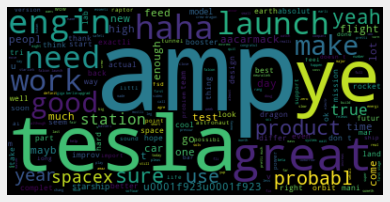

In [19]:

allwords = ' '.join([i for i in df['Text']])
wordcloud = WordCloud().generate(allwords)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

#Create a funtion to compute the negative ,neutral and positive analysis

In [20]:

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [21]:
df

,Unnamed: 0,Text,Subjectivity,Polarity,Analysis
0,1,im alien,0.750000,-0.250000,Negative
1,2,aacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,0.000000,Neutral
2,3,great interview,0.750000,0.800000,Positive
3,4,doge underestim,0.000000,0.000000,Neutral
4,5,congratul tesla china amaz execut last year n...,0.033333,0.000000,Neutral
...,...,...,...,...,...
1994,1995,true sound surreal neg propaganda still amp e...,0.443333,0.186667,Positive
1995,1996,make sure read ur term amp condit click accept,0.888889,0.500000,Positive
1996,1997,samwis gamge,0.000000,0.000000,Neutral
1997,1998,altho dumb dumber u0001f525u0001f525,0.500000,-0.375000,Negative


#TfidfVectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
X = df['Text']
X = tf_idf.fit_transform(X)
X


<1999x3418 sparse matrix of type '<class 'numpy.float64'>'
	with 10913 stored elements in Compressed Sparse Row format>